In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from blackbox_bot import get_blackbox_cmap

In [2]:
TRUE_COLOR_MAP = {6: '#999933',  0: '#000000', 7: '#CC6677', 8: '#882255', 2: '#44AA99', 4: '#4141FF', 3: '#117733', 5: '#AA4499', 9: '#FFFFFF', 1: '#88CCEE'}
TRUE_MAP = {1:0, 9:1, 4:2, 6:3, 5:4, 7:5, 0:6, 2:7, 3:8, 8:9}
true_map = lambda x : np.vectorize(TRUE_MAP.get)(x)

## Pixel changes after one step 

  0%|          | 0/160 [00:00<?, ?it/s]

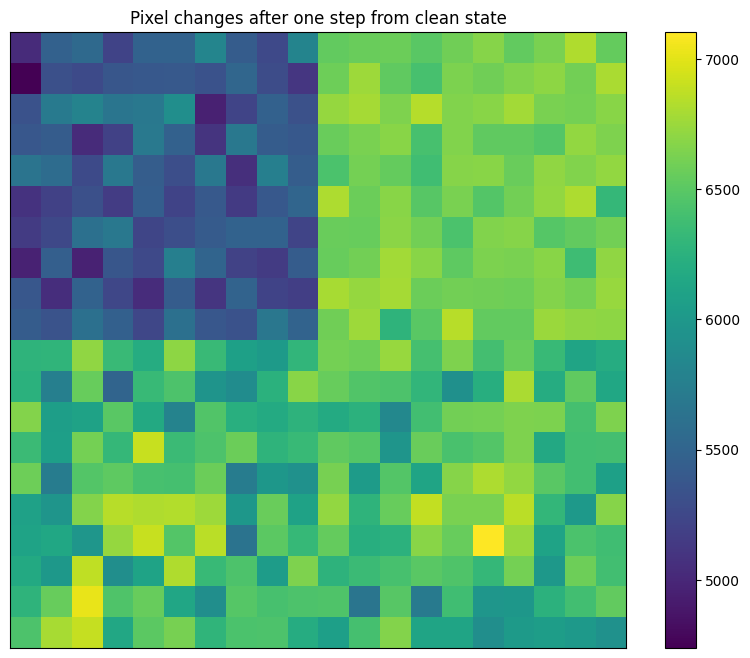

In [5]:
total_differences = np.zeros((20,20))
dir_path = 'data/revert_one_step_prewarm_0'
for file in tqdm(os.listdir(f'./{dir_path}/')):
    data = np.load(f'./{dir_path}/{file}')
    initial_states = data[:,0]
    transitions = data[:,1]
    differences = np.zeros(transitions.shape)
    mask = initial_states != transitions
    differences[mask] = 0
    differences[mask] = 1
    total_differences += np.sum(differences, axis=0)

plt.figure(figsize=(10,8))
plt.title('Pixel changes after one step from clean state')
plt.xticks([])
plt.yticks([])
plt.imshow(total_differences)
plt.colorbar()
plt.savefig('pixel_changes_reset.png', dpi=300, bbox_inches='tight')
plt.show()

## Quadrant - Transitions

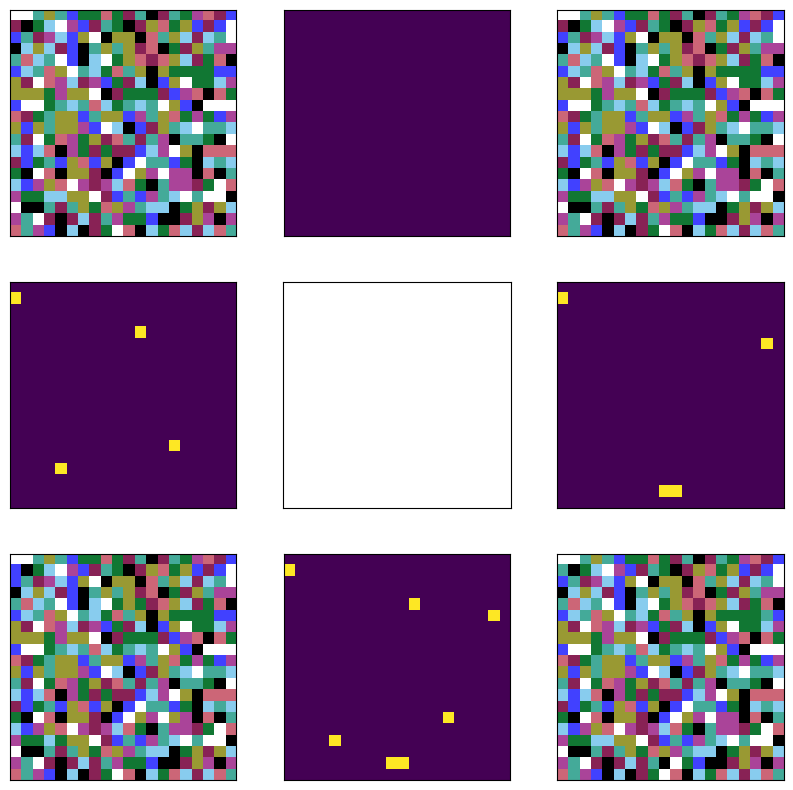

In [6]:
a, b = 0, 46
fig, ax = plt.subplots(3,3,figsize=(10,10))
ax[0,0].imshow(initial_states[a], cmap=get_blackbox_cmap())
ax[0,1].imshow((initial_states[a] != initial_states[b]).astype(int))
ax[0,2].imshow(initial_states[b], cmap=get_blackbox_cmap())

ax[1,0].imshow((initial_states[a] != transitions[a]).astype(int))
#ax[1,1].imshow((transitions[a] != transitions[b]).astype(int))
ax[1,2].imshow((initial_states[b] != transitions[b]).astype(int))

ax[2,0].imshow(transitions[a], cmap=get_blackbox_cmap())
ax[2,1].imshow((transitions[a] != transitions[b]).astype(int))
ax[2,2].imshow(transitions[b], cmap=get_blackbox_cmap())

for ax1 in ax:
    for ax2 in ax1:
        ax2.set_xticks([])
        ax2.set_yticks([])
plt.show()